In [30]:
import numpy as np
from keras import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [31]:
props_vectors_splitted=pd.read_csv('props_vectors.csv')
# There are 12 rows per one row of data consisting of 72 features.
# Drop the first 3 colums and merge 12 rows with different direction and angle 
# into one row of features for given sample.
props_vectors=props_vectors_splitted.iloc[:, 3:].values.reshape(-1, 12*6)
labels=props_vectors_splitted['texture_type'][::12]

In [32]:
label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(labels)
onehot_encoder=OneHotEncoder()
oneshot_encoded=onehot_encoder.fit_transform(integer_encoded.reshape(-1,1))
X_train, X_test, y_train, y_test=train_test_split(props_vectors, oneshot_encoded.toarray(), test_size=0.3)

In [33]:
model=Sequential()

model.add(Dense(10, input_dim=72, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

c:\Users\rosia\Documents\POI1\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │           730 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 774 (3.02 KB)

 Trainable params: 774 (3.02 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.fit(X_train, y_train, epochs=100, batch_size=10, shuffle=True)

Epoch 1/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 0.5685 - loss: 1.1722
Epoch 2/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.6796 - loss: 0.8703
Epoch 3/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.7362 - loss: 0.8209
Epoch 4/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.7607 - loss: 0.7797
Epoch 5/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.8063 - loss: 0.7018
Epoch 6/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.7918 - loss: 0.6601
Epoch 7/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8058 - loss: 0.6144
Epoch 8/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.7890 - loss: 0.6242
Epoch 9/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.8024 - loss: 0.5667
Epoch 10/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.7914 - loss: 0.5678
Epoch 11/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8059 - loss: 0.5286
Epoch 12/100
181/181 

In [36]:
y_pred=model.predict(X_test)
y_pred_int=np.argmax(y_pred, axis=1)
y_test_int=np.argmax(y_test, axis=1)
cm=confusion_matrix(y_test_int, y_pred_int)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[388   0   7   1]
 [  0  44   5   0]
 [ 12   0 157   1]
 [  6   0   0 154]]


Confusion matrix, without normalization
[[388   0   7   1]
 [  0  44   5   0]
 [ 12   0 157   1]
 [  6   0   0 154]]


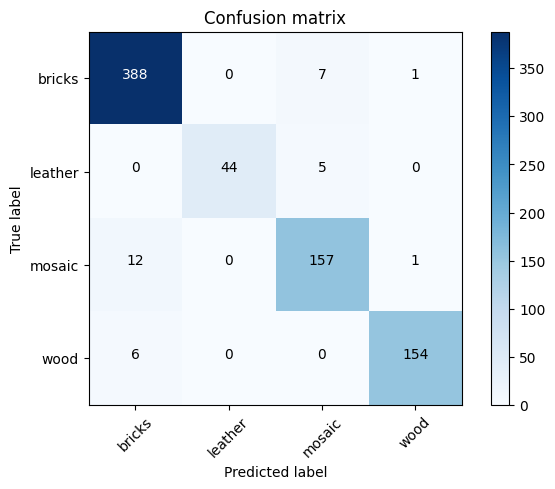

In [43]:
# Confusion matrix plotting code from
# https://medium.com/analytics-vidhya/deep-learning-implementation-with-keras-and-tensorflow-c29ef21e5a1d
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm, labels.unique())

In [37]:
# %pip freeze > requirements.txt